# Stroke Data 

## Importing our Dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from stroke_pipeline import train_test_split_stroke,\
    fill_missing,\
    build_encoders,\
    encode_categorical,\
    build_target_encoder,\
    encode_target

df_original= pd.read_csv("healthcare-dataset-stroke-data.csv")
df_original

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## Exploring Data

In [2]:
display(df_original.shape)
display(df_original.info())
display(df_original.describe())
display(df_original.columns)

(5110, 12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


None

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [3]:
#Lets go ahead and loop through all of our columns and see what data they reveal

def describe_df(df_original: pd.DataFrame):
    print(f"The dataset contains {df_original.shape[1]} columns and {len(df_original)} rows")
    for col in df_original.columns:
        col_dtype = df_original[col].dtype
        print(f"\nColumn: {col} ({col_dtype})")
        if col_dtype == 'object':
            print(f"--- Percentage of NaNs: {df_original[col].isna().sum() / len(df_original[col]) * 100}")
            print(f"--- Unique values:\n {df_original[col].unique()}")
        else:
            print(f"--- Summary statistics:\n {df_original[col].describe()}")
describe_df(df_original)

The dataset contains 12 columns and 5110 rows

Column: id (int64)
--- Summary statistics:
 count     5110.000000
mean     36517.829354
std      21161.721625
min         67.000000
25%      17741.250000
50%      36932.000000
75%      54682.000000
max      72940.000000
Name: id, dtype: float64

Column: gender (object)
--- Percentage of NaNs: 0.0
--- Unique values:
 ['Male' 'Female' 'Other']

Column: age (float64)
--- Summary statistics:
 count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

Column: hypertension (int64)
--- Summary statistics:
 count    5110.000000
mean        0.097456
std         0.296607
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: hypertension, dtype: float64

Column: heart_disease (int64)
--- Summary statistics:
 count    5110.000000
mean        0.054012
std        

## Organizing & Sorting the Dataset

In [4]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# drop ID column
df = df_original.drop(columns='id')
# # convert data to dummies
# df = OneHotEncoder(df['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], handle_unknown='infrequent_if_exist')
# drop NA
#df = df.dropna
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
y = df['stroke'].values.reshape(-1,1)
df_2 = df.copy()
X = df_2.drop(columns='stroke', axis=1)
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked


In [6]:
df_bmi = pd.DataFrame(X['bmi'])
df_bmi
# df_bmi.reset_index()

scaler = StandardScaler()
scale = scaler.fit(df_bmi)
scale
df_bmi_scaled = scale.transform(df_bmi)
df_bmi_scaled

converted_bmi_df = pd.DataFrame(df_bmi_scaled,columns=['BMI'])
converted_bmi_df
#converted_bmi_df=converted_bmi_df.rename(columns={'0':'bmi'}, inplace=True, axis=0)
#print(converted_bmi_df)

,BMI
0,0.981345
1,NaN
2,0.459269
3,0.701207
4,-0.623083
...,...
5105,NaN
5106,1.414286
5107,0.217332
5108,-0.419346


In [7]:
df_age = pd.DataFrame(X['age'])
df_age

scaler = StandardScaler()
scale = scaler.fit(df_age)

df_age_scaled = scale.transform(df_age)
converted_age_df = pd.DataFrame(df_age_scaled,columns=['AGE'])
converted_age_df



,AGE
0,1.051434
1,0.786070
2,1.626390
3,0.255342
4,1.582163
...,...
5105,1.626390
5106,1.670617
5107,-0.363842
5108,0.343796


In [8]:
df_level = pd.DataFrame(X['avg_glucose_level'])

scaler = StandardScaler()
scale = scaler.fit(df_level)

df_level_scaled = scale.transform(df_level)

converted_level_df = pd.DataFrame(df_level_scaled,columns=['Avg_Glucose_Level'])
converted_level_df

,Avg_Glucose_Level
0,2.706375
1,2.121559
2,-0.005028
3,1.437358
4,1.501184
...,...
5105,-0.494658
5106,0.420775
5107,-0.511443
5108,1.328257


In [9]:
age_level_df = pd.concat([converted_bmi_df, converted_age_df, converted_level_df], axis=1)
age_level_df

,BMI,AGE,Avg_Glucose_Level
0,0.981345,1.051434,2.706375
1,NaN,0.786070,2.121559
2,0.459269,1.626390,-0.005028
3,0.701207,0.255342,1.437358
4,-0.623083,1.582163,1.501184
...,...,...,...
5105,NaN,1.626390,-0.494658
5106,1.414286,1.670617,0.420775
5107,0.217332,-0.363842,-0.511443
5108,-0.419346,0.343796,1.328257


In [10]:
X_converted_df = pd.concat([X, age_level_df], axis=1)
X_converted_df.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,BMI,AGE,Avg_Glucose_Level
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,0.981345,1.051434,2.706375
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,NaN,0.786070,2.121559
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,0.459269,1.626390,-0.005028


In [11]:
X_converted_df = X_converted_df.drop(columns='age')
X_converted_df = X_converted_df.drop(columns='avg_glucose_level')
X_converted_df = X_converted_df.drop(columns='bmi')
X_converted_df

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,BMI,AGE,Avg_Glucose_Level
0,Male,0,1,Yes,Private,Urban,formerly smoked,0.981345,1.051434,2.706375
1,Female,0,0,Yes,Self-employed,Rural,never smoked,NaN,0.786070,2.121559
2,Male,0,1,Yes,Private,Rural,never smoked,0.459269,1.626390,-0.005028
3,Female,0,0,Yes,Private,Urban,smokes,0.701207,0.255342,1.437358
4,Female,1,0,Yes,Self-employed,Rural,never smoked,-0.623083,1.582163,1.501184
...,...,...,...,...,...,...,...,...,...,...
5105,Female,1,0,Yes,Private,Urban,never smoked,NaN,1.626390,-0.494658
5106,Female,0,0,Yes,Self-employed,Urban,never smoked,1.414286,1.670617,0.420775
5107,Female,0,0,Yes,Self-employed,Rural,never smoked,0.217332,-0.363842,-0.511443
5108,Male,0,0,Yes,Private,Rural,formerly smoked,-0.419346,0.343796,1.328257


In [12]:
X = X_converted_df
X


,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,BMI,AGE,Avg_Glucose_Level
0,Male,0,1,Yes,Private,Urban,formerly smoked,0.981345,1.051434,2.706375
1,Female,0,0,Yes,Self-employed,Rural,never smoked,NaN,0.786070,2.121559
2,Male,0,1,Yes,Private,Rural,never smoked,0.459269,1.626390,-0.005028
3,Female,0,0,Yes,Private,Urban,smokes,0.701207,0.255342,1.437358
4,Female,1,0,Yes,Self-employed,Rural,never smoked,-0.623083,1.582163,1.501184
...,...,...,...,...,...,...,...,...,...,...
5105,Female,1,0,Yes,Private,Urban,never smoked,NaN,1.626390,-0.494658
5106,Female,0,0,Yes,Self-employed,Urban,never smoked,1.414286,1.670617,0.420775
5107,Female,0,0,Yes,Self-employed,Rural,never smoked,0.217332,-0.363842,-0.511443
5108,Male,0,0,Yes,Private,Rural,formerly smoked,-0.419346,0.343796,1.328257


In [13]:
# Create the encoders for categorical variables (use X_train_filled)
#encoders = build_encoders(X)
#encoders

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,BMI,AGE,Avg_Glucose_Level
4505,Female,1,0,Yes,Private,Urban,never smoked,1.885427,0.741843,2.834691
3576,Male,0,0,Yes,Private,Rural,formerly smoked,-0.050073,-0.098477,-0.489799
3032,Male,0,0,Yes,Private,Urban,formerly smoked,0.204598,0.388024,-0.411617
1867,Female,0,0,Yes,Private,Rural,Unknown,-0.139208,0.520706,-0.942546
494,Female,0,0,Yes,Private,Rural,formerly smoked,1.376085,0.520706,0.111361
...,...,...,...,...,...,...,...,...,...,...
4426,Male,0,0,Yes,Govt_job,Rural,never smoked,0.217332,-0.010023,-0.400796
466,Female,1,0,Yes,Private,Rural,smokes,3.986464,0.786070,1.411298
3092,Female,0,0,No,children,Urban,Unknown,-1.412563,-1.860496,-0.195845
3772,Male,0,0,Yes,Self-employed,Rural,formerly smoked,0.268266,1.626390,1.986176


In [15]:
# Create the encoders for categorical variables (use X_train_filled)
encoders = build_encoders(X_train)
encoders
#gender_encoder = OneHotEncoder(max_categories=2, handle_unknown='ignore', sparse_output=False)
    # Train the encoder
#gender_encoder.fit(X_train['gender'].values.reshape(-1, 1))
#X_train

[{'column': 'gender',
  'multi_col_output': True,
  'encoder': OneHotEncoder(handle_unknown='ignore', max_categories=2, sparse_output=False)},
 {'column': 'ever_married',
  'multi_col_output': True,
  'encoder': OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)},
 {'column': 'work_type',
  'multi_col_output': True,
  'encoder': OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)},
 {'column': 'Residence_type',
  'multi_col_output': True,
  'encoder': OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)},
 {'column': 'smoking_status',
  'multi_col_output': True,
  'encoder': OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)}]

In [16]:
# # Create an encoder for the age column
# age_ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

# # Train the encoder
# age_ohe.fit(X_train['age'].values.reshape(-1,1))

# age_encoded = age_ohe.transform(X_train['age'].values.reshape(-1,1))
# #   avg_glucose_level_encoded = avg_glucose_level_enc.transform(X_data['avg_glucose_level'].values.reshape(-1,1))

#     # Reorganize the numpy arrays into a DataFrame
# age_df = pd.DataFrame(age_encoded, columns = age_ohe.get_feature_names_out())
# #    avg_glucose_level_df = pd.DataFrame(avg_glucose_level_encoded, columns= avg_glucose_level_ohe.get_feature_names_out())
# #     out_df = pd.concat([age_df, avg_glucose_level_df], axis = 1)
# #     out_df['grade'] = grade_encoded

#     # Return the DataFrame
# #     return out_df
# age_df

In [17]:
# def X_preprocess(X_data):
#     # Transform each column into numpy arrays
#     age_encoded = age_ohe.transform(X_data['age'].values.reshape(-1,1))
# #   avg_glucose_level_encoded = avg_glucose_level_enc.transform(X_data['avg_glucose_level'].values.reshape(-1,1))

#     # Reorganize the numpy arrays into a DataFrame
#     age_df = pd.DataFrame(age_encoded, columns = age_ohe.get_feature_names_out())
# #    avg_glucose_level_df = pd.DataFrame(avg_glucose_level_encoded, columns= avg_glucose_level_ohe.get_feature_names_out())
# #     out_df = pd.concat([age_df, avg_glucose_level_df], axis = 1)
# #     out_df['grade'] = grade_encoded

#     # Return the DataFrame
#     return out_df

In [18]:

# Scaling the X data by using StandardScaler()
#scaler = StandardScaler().fit(X_train)
#X_train_scaled = scaler.transform(X_train[['AGE', 'Avg_Glucose_Level']])
#X_train_scaled

In [19]:
# Fill the missing values using the imported function
X_train_filled = fill_missing(X_train)
X_test_filled = fill_missing(X_test)

#X_train['gender'] = X_train['gender'].fillna('unknown')

#X_train['ever_married'] = X_train['ever_married'].fillna('primary')
    
#X_train['work_type'] = X_train['work_type'].fillna('unknown')
   

#X_train['Residence_type'] = X_train['Residence_type'].fillna('unkown')
 

#X_train['smoking_status'] = X_train['smoking_status'].fillna('unknown')

#X_train['BMI'] = X_train['BMI'].fillna('unkown')
    
X_train_filled.head()
#X_test_filled.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,BMI,AGE,Avg_Glucose_Level
4505,Female,1,0,Yes,Private,Urban,never smoked,1.885427,0.741843,2.834691
3576,Male,0,0,Yes,Private,Rural,formerly smoked,-0.050073,-0.098477,-0.489799
3032,Male,0,0,Yes,Private,Urban,formerly smoked,0.204598,0.388024,-0.411617
1867,Female,0,0,Yes,Private,Rural,Unknown,-0.139208,0.520706,-0.942546
494,Female,0,0,Yes,Private,Rural,formerly smoked,1.376085,0.520706,0.111361


In [20]:
X_test_filled.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,BMI,AGE,Avg_Glucose_Level
4688,Male,0,0,No,Self-employed,Rural,Unknown,-0.750419,-0.540751,-0.912069
4478,Male,0,0,Yes,Self-employed,Rural,never smoked,-0.07554,-0.142705,-0.902351
3849,Female,0,0,No,children,Urban,Unknown,-0.814086,-1.557980,-0.700713
4355,Female,1,0,Yes,Self-employed,Rural,never smoked,-1.196093,1.582163,-0.651684
3826,Female,0,0,Yes,Govt_job,Rural,never smoked,-0.215609,1.405253,-0.251279


In [74]:
def no_pipeline_encode_categorical(X_filled, encoders):
    # Separate numeric columns
    dfs = [X_filled.select_dtypes(include='number').reset_index(drop=True)]
    dfs[0:5]
    
    single_col_encoders = []
    for encoder_dict in encoders:
        encoder = encoder_dict['encoder']
        column = encoder_dict['column']
        multi_col = encoder_dict['multi_col_output']
        if not multi_col:
            single_col_encoders.append(encoder_dict)
        else:
            dfs.append(pd.DataFrame(encoder.transform(X_filled[column].values.reshape(-1, 1)), columns=encoder.get_feature_names_out()))
    
    X_encoded = pd.concat(dfs, axis=1)
    X_encoded.head()

    for encoder_dict in single_col_encoders:
        encoder = encoder_dict['encoder']
        column = encoder_dict['column']
        multi_col = encoder_dict['multi_col_output']
        X_encoded[column] = encoder.transform(X_filled[column].values.reshape(-1, 1))

    return X_encoded


In [54]:
X_train_filled.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,BMI,AGE,Avg_Glucose_Level
4505,Female,1,0,Yes,Private,Urban,never smoked,1.885427,0.741843,2.834691
3576,Male,0,0,Yes,Private,Rural,formerly smoked,-0.050073,-0.098477,-0.489799
3032,Male,0,0,Yes,Private,Urban,formerly smoked,0.204598,0.388024,-0.411617
1867,Female,0,0,Yes,Private,Rural,Unknown,-0.139208,0.520706,-0.942546
494,Female,0,0,Yes,Private,Rural,formerly smoked,1.376085,0.520706,0.111361


In [73]:
# Encode X_train_filled and X_test_filled


#X_train_encoded = no_pipeline_encode_categorical(X_train_filled, encoders)
dfs = [X_train_filled.select_dtypes(include='number').reset_index(drop=True)]
dfs[0:5]
    
single_col_encoders = []

for encoder_dict in encoders:
    encoder = encoder_dict['encoder']
    print(encoder)
    column = encoder_dict['column']
    multi_col = encoder_dict['multi_col_output']
    if not multi_col:
        single_col_encoders.append(encoder_dict)
    else:
        dfs.append(pd.DataFrame(encoder.transform(X_train_filled[column].values.reshape(-1, 1)), columns=encoder.get_feature_names_out()))
    
#    dfs[0:5]
    X_encoded = pd.concat(dfs, axis=1)
    X_encoded.head()

for encoder_dict in single_col_encoders:
    encoder = encoder_dict['encoder']
    column = encoder_dict['column']
    multi_col = encoder_dict['multi_col_output']
    X_encoded[column] = encoder.transform(X_train_filled[column].values.reshape(-1, 1))


#X_test_encoded = no_pipeline_encode_categorical(X_test_filled, encoders)

#X_train_encoded.head()

OneHotEncoder(handle_unknown='ignore', max_categories=2, sparse_output=False)
OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)


In [56]:
X_train_encoded.head()


,hypertension,heart_disease,AGE,Avg_Glucose_Level,x0_Female,x0_infrequent_sklearn,x0_Yes,x0_Never_worked,x0_Private,x0_Self-employed,x0_children,x0_Urban,x0_formerly smoked,x0_never smoked,x0_smokes
0,1,0,0.741843,2.834691,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0,0,-0.098477,-0.489799,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,0,0.388024,-0.411617,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0,0,0.520706,-0.942546,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0.520706,0.111361,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [57]:
X_test_encoded.head()

,hypertension,heart_disease,AGE,Avg_Glucose_Level,x0_Female,x0_infrequent_sklearn,x0_Yes,x0_Never_worked,x0_Private,x0_Self-employed,x0_children,x0_Urban,x0_formerly smoked,x0_never smoked,x0_smokes
0,0,0,-0.540751,-0.912069,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0,0,-0.142705,-0.902351,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0,0,-1.557980,-0.700713,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,1,0,1.582163,-0.651684,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0,0,1.405253,-0.251279,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [58]:
# Encode y_train and y_test
y_encoder = build_target_encoder(y_train)
y_train_encoded = encode_target(y_train, y_encoder)
y_test_encoded = encode_target(y_test, y_encoder)

In [59]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components = 10)
pca_model.fit(X_train_encoded)

X_train_pca = pd.DataFrame(pca_model.transform(X_train_encoded))
X_test_pca = pd.DataFrame(pca_model.transform(X_test_encoded))
X_train_pca

,0,1,2,3,4,5,6,7,8,9
0,2.365409,1.668221,-1.028771,-0.515498,0.302379,-0.587581,-0.074193,0.044463,-0.225983,0.735059
1,-0.209617,-0.313961,0.957519,-0.401888,-0.499605,0.583784,-0.600146,-0.425579,0.158465,0.017657
2,0.208861,-0.517715,0.991880,-0.260632,-0.644772,-0.387881,-0.639135,-0.263358,0.081082,-0.033411
3,-0.104329,-1.175963,-0.376275,-0.273563,-0.345689,0.569966,0.012613,-0.044276,-0.278123,-0.130561
4,0.578432,-0.366703,-0.436390,-0.166789,-0.679499,0.647157,-0.658863,-0.201071,0.015526,-0.072583
...,...,...,...,...,...,...,...,...,...,...
3827,-0.174053,-0.238005,0.774985,-0.046971,0.913079,0.366366,0.110014,-0.386204,-0.204351,-0.092703
3828,1.545389,0.562750,-0.662712,-0.282556,-0.638331,0.583155,0.723859,0.183896,-0.165321,0.810053
3829,-1.890352,1.017975,-0.626482,0.685277,-0.190155,-0.441874,-0.082198,0.002101,-0.342529,0.034335
3830,2.537360,0.810104,0.851979,0.894658,-0.015307,0.648161,-0.434848,-0.061491,0.374387,-0.293114


In [60]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train_pca, y_train_encoded)

RandomForestClassifier()

In [61]:
y_test_pred = model.predict(X_test_pca)
print(balanced_accuracy_score(y_test_encoded, y_test_pred))

0.5224958263772955


In [62]:
y_train_pred = model.predict(X_train_pca)
print(balanced_accuracy_score(y_train_encoded, y_train_pred))

1.0


In [63]:
models = {'train_score': [], 'test_score': [], 'max_depth': []}

for depth in range(1,10):
    models['max_depth'].append(depth)
    model = RandomForestClassifier(n_estimators=100, max_depth=depth)
    model.fit(X_train_pca, y_train_encoded)
    y_test_pred = model.predict(X_test_pca)
    y_train_pred = model.predict(X_train_pca)

    models['train_score'].append(balanced_accuracy_score(y_train_encoded, y_train_pred))
    models['test_score'].append(balanced_accuracy_score(y_test_encoded, y_test_pred))

models_df = pd.DataFrame(models)

<Axes: xlabel='max_depth'>

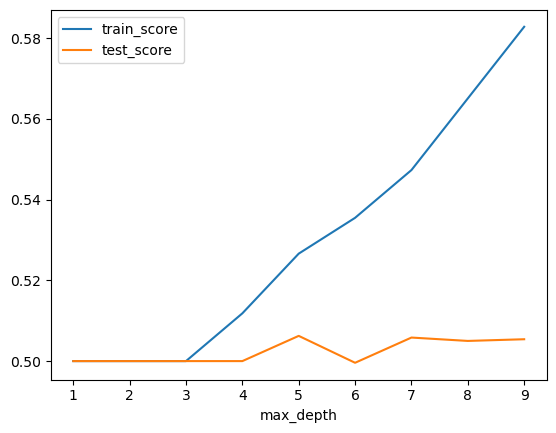

In [64]:
models_df.plot(x='max_depth')

In [65]:
models = {'train_score': [], 'test_score': [], 'n_estimators': []}

for n in [50, 100, 500, 1000]:
    models['n_estimators'].append(n)
    model = RandomForestClassifier(n_estimators=n, max_depth=7)
    model.fit(X_train_pca, y_train_encoded)
    y_test_pred = model.predict(X_test_pca)
    y_train_pred = model.predict(X_train_pca)

    models['train_score'].append(balanced_accuracy_score(y_train_encoded, y_train_pred))
    models['test_score'].append(balanced_accuracy_score(y_test_encoded, y_test_pred))

models_df = pd.DataFrame(models)

<Axes: xlabel='n_estimators'>

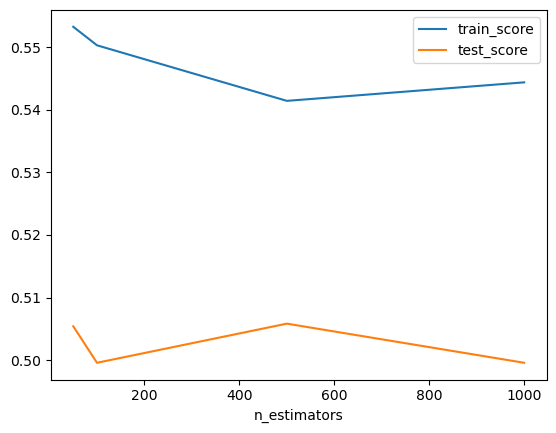

In [66]:
models_df.plot(x='n_estimators')

In [67]:
from sklearn.neighbors import KNeighborsClassifier


from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
    'weights': ['uniform', 'distance'],
    'leaf_size': [10, 50, 100, 500]
}
random_knn = RandomizedSearchCV(KNeighborsClassifier(), param_grid, verbose=3)

random_knn.fit(X_train_pca, y_train_encoded)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END leaf_size=50, n_neighbors=7, weights=uniform;, score=0.954 total time=   0.2s
[CV 2/5] END leaf_size=50, n_neighbors=7, weights=uniform;, score=0.956 total time=   0.2s
[CV 3/5] END leaf_size=50, n_neighbors=7, weights=uniform;, score=0.956 total time=   0.1s
[CV 4/5] END leaf_size=50, n_neighbors=7, weights=uniform;, score=0.956 total time=   0.2s
[CV 5/5] END leaf_size=50, n_neighbors=7, weights=uniform;, score=0.954 total time=   0.2s
[CV 1/5] END leaf_size=500, n_neighbors=9, weights=uniform;, score=0.954 total time=   0.2s
[CV 2/5] END leaf_size=500, n_neighbors=9, weights=uniform;, score=0.956 total time=   0.2s
[CV 3/5] END leaf_size=500, n_neighbors=9, weights=uniform;, score=0.957 total time=   0.1s
[CV 4/5] END leaf_size=500, n_neighbors=9, weights=uniform;, score=0.956 total time=   0.2s
[CV 5/5] END leaf_size=500, n_neighbors=9, weights=uniform;, score=0.956 total time=   0.2s
[CV 1/5] END leaf_size=1

RandomizedSearchCV(estimator=KNeighborsClassifier(),
                   param_distributions={'leaf_size': [10, 50, 100, 500],
                                        'n_neighbors': [1, 3, 5, 7, 9, 11, 13,
                                                        15, 17, 19],
                                        'weights': ['uniform', 'distance']},
                   verbose=3)

In [68]:
y_pred = random_knn.predict(X_test_pca)
print(balanced_accuracy_score(y_test_encoded, y_pred))

0.5


In [69]:
model = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=13)
model.fit(X_train_encoded, y_train_encoded)
y_pred = model.predict(X_test_encoded)
print(balanced_accuracy_score(y_test_encoded, y_pred))

0.5


In [70]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42)
model.fit(X_train_encoded, y_train_encoded)
y_pred = model.predict(X_test_encoded)
print(balanced_accuracy_score(y_test_encoded, y_pred))

0.5
